# Importing Data

In [1]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

# We Are Using Boston Dataset - Importing Boston Dataset

In [2]:
from sklearn.datasets import load_boston

# About Dataset

In [4]:
boston_data = load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Converting Data to Dataset

In [5]:
import numpy as np
import pandas as pd

dataset = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
dataset["target"] = boston_data.target

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Basic Analysis On Data

In [7]:
dataset.shape

(506, 14)

In [8]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [9]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

# In Depth Analysis Of Data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

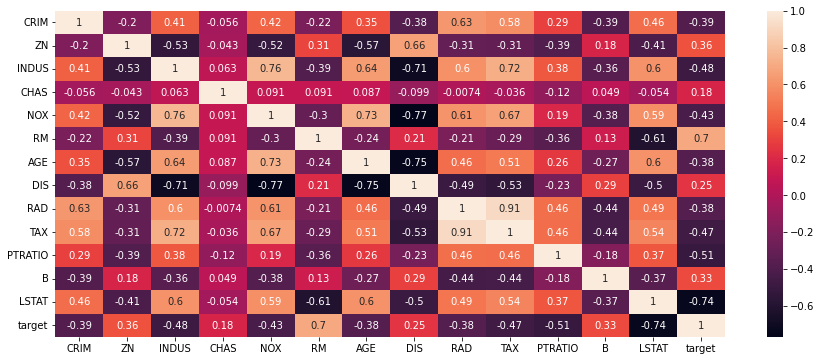

In [17]:
figure(figsize = (15,6))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Feature Selection
- From correlation data select appropriate features with target

In [18]:
features = ["LSTAT", "RM"]
target = dataset["target"]

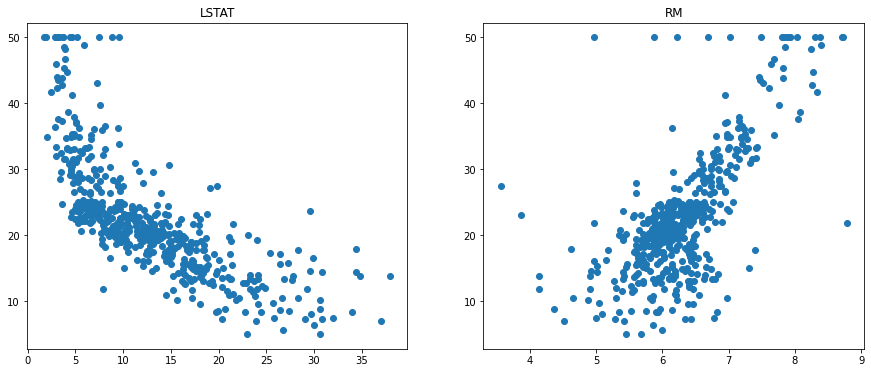

In [22]:
figure(figsize = (15,6))
for i,col in enumerate(features):
	plt.subplot(1,len(features), i+1)
	x = dataset[col]
	y = target
	plt.scatter(x,y,marker = "o")
	plt.title(col)

# Splitting the Data for Training And Testing

In [24]:
X = pd.DataFrame(np.c_[dataset["LSTAT"], dataset["RM"]],columns = ["LSTAT","RM"])
y = dataset["target"]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

# Modelling

# Regressor Algorithms and Metrics Used

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [27]:
from sklearn.metrics import r2_score

# Linear Regression

In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)

In [35]:
lr_r2_train = r2_score(y_train,lr_pred_train)
lr_r2_test = r2_score(y_test,lr_pred_test)

In [37]:
print(lr_r2_train)
print(lr_r2_test)

0.6300745149331701
0.6628996975186953


# Decision Tree

In [38]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [39]:
dtr_pred_train = dtr.predict(x_train)
dtr_pred_test = dtr.predict(x_test)

In [49]:
dtr_r2_train = r2_score(y_train,dtr_pred_train)
dtr_r2_test = r2_score(y_test,dtr_pred_test)

In [50]:
print(dtr_r2_train)
print(dtr_r2_test)

1.0
0.5836625880660065


# Support Vector Machine

In [43]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [44]:
svr_pred_train = svr.predict(x_train)
svr_pred_test = svr.predict(x_test)

In [51]:
svr_r2_train = r2_score(y_train,svr_pred_train)
svr_r2_test = r2_score(y_test,svr_pred_test)

In [52]:
print(svr_r2_train)
print(svr_r2_test)

0.6374510268467587
0.6492817952869661


# Lasso

In [47]:
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [48]:
lasso_pred_train = lasso.predict(x_train)
lasso_pred_test = lasso.predict(x_test)

In [53]:
lasso_r2_train = r2_score(y_train,lasso_pred_train)
lasso_r2_test = r2_score(y_test,lasso_pred_test)

In [54]:
print(lasso_r2_train)
print(lasso_r2_test)

0.5972167528577907
0.5809217719910149


# Random Forest

In [56]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
rfr_pred_train = rfr.predict(x_train)
rfr_pred_test = rfr.predict(x_test)

In [58]:
rfr_r2_train = r2_score(y_train,rfr_pred_train)
rfr_r2_test = r2_score(y_test,rfr_pred_test)

In [59]:
print(rfr_r2_train)
print(rfr_r2_test)

0.9608482902898116
0.768190532413929


# Conclusion
- From above we can get a conclusion that using Random Forest is best in this scenerio